In [1]:
%reset
# import get_marked2pt as m2pt
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import os
# import camb
# import LSS_funcs as ghmf
# import general_funcs as gnf
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=False)
plt.rc('font', family='serif')



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [7]:
import dill
import sys, os
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/cosmosis'
df_name = '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/DV_obj_temp_gty_planck_beamed.pk'

DV = dill.load(open(df_name,'rb'))




In [8]:
DV.fftcovtot_dict['gty_gty'].keys()



dict_keys(['bin_1_0_1_0', 'theta', 'bin_1_0_2_0', 'bin_1_0_3_0', 'bin_1_0_4_0', 'bin_2_0_1_0', 'bin_2_0_2_0', 'bin_2_0_3_0', 'bin_2_0_4_0', 'bin_3_0_1_0', 'bin_3_0_2_0', 'bin_3_0_3_0', 'bin_3_0_4_0', 'bin_4_0_1_0', 'bin_4_0_2_0', 'bin_4_0_3_0', 'bin_4_0_4_0', 'bins_comb'])

In [10]:
ind_th_sel = np.where( (DV.fftcovtot_dict['ky_ky']['theta'] > 2.5) & (DV.fftcovtot_dict['ky_ky']['theta'] < 250.0))[0]

DV.fftcovtot_dict['ky_ky']['theta'][ind_th_sel]



array([  2.7323496 ,   3.43979508,   4.33040859,   5.45161502,
         6.86311829,   8.64008049,  10.87712434,  13.69337171,
        17.23878693,  21.70216227,  27.32117108,  34.39502388,
        43.30040114,  54.51151148,  68.62534309,  86.39345315,
       108.76198809, 136.92206553, 172.37320095, 217.00315644])

In [12]:
(DV.fftcovtot_dict['ky_ky']['bin_1_0_1_0'][ind_th_sel,:][:,ind_th_sel]).shape



(20, 20)

In [17]:
cov_gty_gty = np.zeros((80,80))

for j1 in range(4):
    for j2 in range(4):
        cov_gty_gty[20*j1:20*(j1+1),20*j2:20*(j2+1)] = DV.fftcovtot_dict['ky_ky']['bin_' + str(j1+1) + '_0_' + str(j2+1) + '_0'][ind_th_sel,:][:,ind_th_sel]   



In [19]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr



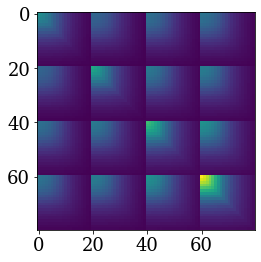

In [18]:
plt.figure()
plt.imshow(cov_gty_gty)
plt.show()


In [20]:
corr_gty_gty = get_corr(cov_gty_gty)



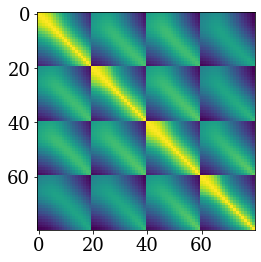

In [21]:
plt.figure()
plt.imshow(corr_gty_gty)
plt.show()

